In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as pat
import csv
import pandas as pd
import numpy as np

In [2]:
def rrange(start,stop,step=1):
    vals=[]
    while start<=stop:
        vals.append(start)
        start+=step
    return vals

In [14]:
def graphit(filename):
    #fig = plt.figure(figsize=(8,9.4))
    fig = plt.figure()
    for i_ax, ev in enumerate(['test','train']):
        #Prep the dataframe for ploting
        df = pd.read_csv(filename+f'cali_{ev}.csv')
        df['bin']=pd.cut(df['softmax'],np.linspace(0,1,int(1/0.05)+1),include_lowest=False)
        df=df.drop('softmax',axis='columns')
        df=df.groupby('bin').mean().reset_index()
        df['x']=rrange(0,1,0.05)
        df.rename(columns={'correct':'y'},inplace=True)
        #print(df['y'])

        #Plot and plot options
        ax=fig.add_subplot(2,2,i_ax+1)
        df.plot.bar('x','y',ax=ax,legend=False)
        ax.set_xticklabels(df.bin)
        ax.plot([0,20],[0,1],'k--')
        ax.set_xlabel('Bins')
        ax.set_ylabel('Accuracy')
        ax.set_title(ev.capitalize())
    #fig.subplots_adjust(hspace=.6)
    fig.tight_layout()

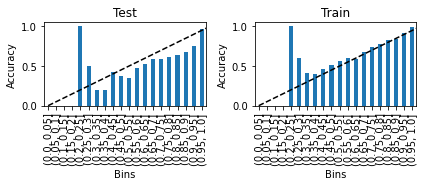

In [15]:
graphit('./exp_outputs/chris/')